# Gradient Boosting Decision Trees

#### Instructions

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1>1. GBDT (xgboost/lightgbm) </h1>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 1.1 Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

import os
import joblib, pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Assignments/As13_Apply GBDT on Donors choose dataset/'
data = pd.read_csv(filepath + 'preprocessed_data.csv')
data.head(2)

FileNotFoundError: ignored

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
X = data.drop(['project_is_approved'], axis=1) # independent input features
y = data['project_is_approved']   # dependent Target variable

print(X.shape, y.shape)

# Splitting x and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify = y, random_state= 15)

print('Train data shape:', X_train.shape, y_train.shape)  # train data
print('Test data shape: ', X_test.shape, y_test.shape)    # test data

(109248, 8) (109248,)
Train data shape: (87398, 8) (87398,)
Test data shape:  (21850, 8) (21850,)


In [ ]:
# Importing Glove model
import pickle
with open(filepath + 'glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## 1.3 Make Data Model Ready: encoding eassay, and project_title

### Preprocessed Essay (TFIDF)

In [ ]:
def vectorize_essay(vectorizer, train_data, test_data, num_max_features= None):
    '''
    This function fits on train data and transforms on both train and test TEXT data for given maximum number of features.
    It returns vectorized form of train and test TEXT data along with list of feature names.
    '''
    # a feature is considered if it is repeated in atleast 10 docs
    # consecutive words upto 3 is considered
    vec = vectorizer(min_df = 10, ngram_range=(1,3), max_features = num_max_features)

    x_train_vectorized = vec.fit_transform(train_data)  # fit and transform train data
    x_test_vectorized = vec.transform(test_data)        # Transform test data

    features = vec.get_feature_names()   # List of feature names

    return x_train_vectorized, x_test_vectorized, features

In [ ]:
# set1 : preprocessed_eassay (TFIDF with 1000 features)
vectorizer = TfidfVectorizer
num_features = 1000

if not (os.path.isfile(filepath+'X_train_essay_tfidf_'+ str(num_features)+'.pkl') and os.path.isfile(filepath+'X_test_essay_tfidf_'+ str(num_features)+'.pkl')):
    X_train_essay_tfidf, X_test_essay_tfidf, features_essay_tfidf = vectorize_essay(vectorizer, X_train['essay'], X_test['essay'], num_features)
    joblib.dump(X_train_essay_tfidf, filepath+'/X_train_essay_tfidf_'+ str(num_features)+'.pkl')
    joblib.dump(X_test_essay_tfidf, filepath+'/X_test_essay_tfidf_'+ str(num_features)+'.pkl')
    joblib.dump(features_essay_tfidf, filepath+'/features_essay_tfidf_'+ str(num_features)+'.pkl')
else:
    X_train_essay_tfidf = joblib.load(filepath+'/X_train_essay_tfidf_'+ str(num_features)+'.pkl')
    X_test_essay_tfidf = joblib.load(filepath+'/X_test_essay_tfidf_'+ str(num_features)+'.pkl')
    features_essay_tfidf = joblib.load(filepath+'/features_essay_tfidf_'+ str(num_features)+'.pkl')

print('After Tfidf vectorization')
print('Train data with', len(features_essay_tfidf) ,'features  : ', X_train_essay_tfidf.shape, y_train.shape)
print('Test data with', len(features_essay_tfidf) ,'features   : ', X_test_essay_tfidf.shape, y_test.shape)

After Tfidf vectorization
Train data with 1000 features  :  (87398, 1000) (87398,)
Test data with 1000 features   :  (21850, 1000) (21850,)


### Preprocessed Essay (TFIDF W2V)

In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
from tqdm import tqdm

def tfidf_w2v_vectors(X):

    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(X): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
            tfidf_w2v_vectors.append(vector)

    return tfidf_w2v_vectors

In [ ]:
# train data
if not os.path.isfile(filepath+'/tfidf_w2v_train.pkl'):
    tfidf_w2v_train = tfidf_w2v_vectors(X_train['essay'])
    joblib.dump(tfidf_w2v_train, filepath+'/tfidf_w2v_train.pkl')
else:
    tfidf_w2v_train = joblib.load(filepath+'/tfidf_w2v_train.pkl')

# Test data
if not os.path.isfile(filepath+'/tfidf_w2v_test.pkl'):
    tfidf_w2v_test = tfidf_w2v_vectors(X_test['essay'])
    joblib.dump(tfidf_w2v_test, filepath+'/tfidf_w2v_test.pkl')
else:
    tfidf_w2v_test = joblib.load(filepath+'/tfidf_w2v_test.pkl')


# Features of tfidf_w2v vector
features_tfidf_w2v = []
for i in range(1, len(tfidf_w2v_train[0])+1):
    features_tfidf_w2v.append('f_'+ str(i))

### Preprocessed Essay (Sentiment scores)

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def sentiment_scores(data_col):
    '''This function returns the sentiment scores of text data passed'''

    neg, neu, pos, compound = [], [], [], []

    for essay in tqdm(data_col):
        ss = sid.polarity_scores(essay)
        neg.append(ss['neg'])
        neu.append(ss['neu'])
        pos.append(ss['pos'])
        compound.append(ss['compound'])

    sentiment_scores_df = pd.DataFrame({'neg': neg,
                       'neu': neu,
                       'pos': pos,
                       'compound' : compound})

    return sentiment_scores_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
if not os.path.isfile(filepath+'/sentiment_scores_train.csv'):
    sentiment_scores_train = sentiment_scores(X_train['essay'])
    sentiment_scores_train.to_csv(filepath+'/sentiment_scores_train.csv', index=False)
else:
    sentiment_scores_train = pd.read_csv(filepath+'/sentiment_scores_train.csv')

if not os.path.isfile(filepath+'/sentiment_scores_test.csv'):
    sentiment_scores_test = sentiment_scores(X_test['essay'])
    sentiment_scores_test.to_csv(filepath+'/sentiment_scores_test.csv', index=False)
else:
    sentiment_scores_test = pd.read_csv(filepath+'/sentiment_scores_test.csv')

print('Shape of sentiment scores on train data : ', sentiment_scores_train.shape)
print('Shape of sentiment scores on test data : ', sentiment_scores_test.shape)

Shape of sentiment scores on train data :  (87398, 4)
Shape of sentiment scores on test data :  (21850, 4)


## 1.4 Make Data Model Ready: encoding numerical, categorical features

### Numerical Features

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

if not (os.path.isfile(filepath+'/X_train_num_features.pkl') and os.path.isfile(filepath+'/X_test_num_features.pkl')):
    # normalizing feature price row wise
    X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1)).T
    X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).T

    # normalizing feature teacher_number_of_previously_posted_projects row wise
    X_train_numprojects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
    X_test_numprojects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T

    X_train_num_features = np.concatenate((X_train_price_norm, X_train_numprojects_norm), axis=1)
    X_test_num_features = np.concatenate((X_test_price_norm, X_test_numprojects_norm), axis=1)

    joblib.dump(X_train_num_features, filepath+'/X_train_num_features.pkl')
    joblib.dump(X_test_num_features, filepath+'/X_test_num_features.pkl')

else:
    X_train_num_features = joblib.load(filepath+'/X_train_num_features.pkl')
    X_test_num_features = joblib.load(filepath+'/X_test_num_features.pkl')

print("Numerical features shape 'price' and 'teacher_number_of_previously_posted_projects' after vectorization")
print(X_train_num_features.shape, y_train.shape)
print(X_test_num_features.shape, y_test.shape)

Numerical features shape 'price' and 'teacher_number_of_previously_posted_projects' after vectorization
(87398, 2) (87398,)
(21850, 2) (21850,)


### Categorical Features

In [ ]:
def response_coding(train_data, test_data, target_data, categorical_features):
    '''This function encodes the categorical features to their probability with respect to all clas labels'''

    tr_cat_response = np.empty((0, train_data.shape[0])) # empty array for storing response on train data
    te_cat_response = np.empty((0, test_data.shape[0]))  # empty array for storing response on test data
    response_categorical_features = []  # to store new features after response encoding

    for feature in categorical_features:  # for each feature in categorical data
        for cls in target_data.unique():  # For each class in y_train
            # creating dictionary of categories as keys and their probabilities with respect to each class labels on train data
            dictionary = dict(train_data[feature][target_data == cls].value_counts() / train_data[feature].value_counts())

            # map the probability values calculated using train data on train and test data
            map_tr = list(train_data[feature].map(dictionary).replace(np.nan, 0))  # Default value set to 0
            map_te = list(test_data[feature].map(dictionary).replace(np.nan, 0))   # Default value set to 0
            tr_cat_response = np.append(tr_cat_response, np.array([map_tr]), axis= 0)  # Append mapped probability values of train data
            te_cat_response = np.append(te_cat_response, np.array([map_te]), axis= 0)  # Append mapped probability values of test data

            response_categorical_features.append(feature + '_' + str(cls))  # Appending new probability feature for each class

        # Check if sum of probabilities of each class is equal to zero. If not set the default value to 0.5
        te_set_pos = set(np.where(te_cat_response[-2] == 0)[0])
        te_set_neg = set(np.where(te_cat_response[-1] == 0)[0])
        te_set_0 = list(te_set_pos.intersection(te_set_neg))

        te_cat_response[-2][te_set_0] = 0.5
        te_cat_response[-1][te_set_0] = 0.5

    return tr_cat_response.T , te_cat_response.T, response_categorical_features

In [ ]:
categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','clean_categories', 'clean_subcategories']

if not (os.path.isfile(filepath+ '/X_train_cat_response.pkl') and os.path.isfile(filepath+ '/X_test_cat_response.pkl') and os.path.isfile(filepath+ '/response_cat_features.pkl')):
    X_train_cat_response, X_test_cat_response, response_categorical_features = response_coding(X_train, X_test, y_train, categorical_features)

    joblib.dump(X_train_cat_response, filepath+ '/X_train_cat_response.pkl')
    joblib.dump(X_test_cat_response, filepath+ '/X_test_cat_response.pkl')
    joblib.dump(response_categorical_features, filepath+ '/response_cat_features.pkl')
else:
    X_train_cat_response = joblib.load(filepath+ '/X_train_cat_response.pkl')
    X_test_cat_response = joblib.load(filepath+ '/X_test_cat_response.pkl')
    response_categorical_features = joblib.load(filepath+ '/response_cat_features.pkl')

# Verifying if sum of probabilities is equal to 1
for i in range(0,len(response_categorical_features), 2):
    print(response_categorical_features[i], X_train_cat_response[:,i:i+2][np.sum(X_train_cat_response[:, i:i+2], axis=1) == 1].shape, X_test_cat_response[:,i:i+2][np.sum(X_test_cat_response[:, i:i+2], axis=1) == 1].shape)

school_state_0 (87398, 2) (21850, 2)
teacher_prefix_0 (87398, 2) (21850, 2)
project_grade_category_0 (87398, 2) (21850, 2)
clean_categories_0 (87398, 2) (21850, 2)
clean_subcategories_0 (87398, 2) (21850, 2)


## 1.5 Concatenating all the features

In [ ]:
from scipy.sparse import hstack

# Feature set 1: categorical(response coding), numerical features + preprocessed_eassay(TFIDF) + sentiment score of eassay
X_set1_tr = hstack((X_train_cat_response, X_train_num_features, X_train_essay_tfidf, sentiment_scores_train.values)).tocsr()
X_set1_te = hstack((X_test_cat_response, X_test_num_features, X_test_essay_tfidf, sentiment_scores_test.values)).tocsr()


# Feature set 2: categorical(response coding), numerical features + preprocessed_eassay (TFIDF W2V)
X_set2_tr = np.hstack((X_train_cat_response, X_train_num_features, tfidf_w2v_train))
X_set2_te = np.hstack((X_test_cat_response, X_test_num_features, tfidf_w2v_test))

print('shape of train and test data of feature set 1 respectively  : ', X_set1_tr.shape, X_set1_te.shape)
print('shape of train and test data of feature set 2 respectively  : ', X_set2_tr.shape, X_set2_te.shape)

shape of train and test data of feature set 1 respectively  :  (87398, 1016) (21850, 1016)
shape of train and test data of feature set 2 respectively  :  (87398, 312) (21850, 312)


In [ ]:
# Feature set 1: categorical, numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)
feature_names_set1 = response_categorical_features + ['price', 'teacher_number_of_previously_posted_projects'] + features_essay_tfidf + ['neg', 'neu', 'pos', 'compound']

# Feature set 2: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)
feature_names_set2 = response_categorical_features + ['price', 'teacher_number_of_previously_posted_projects'] + features_tfidf_w2v

print('total number of features of set1 and set2 respectively  : ', len(feature_names_set1), len(feature_names_set2))

total number of features of set1 and set2 respectively  :  1016 312


In [ ]:
# Concatenation that are useful ahead

x_train_data_sets = [X_set1_tr, X_set2_tr]  # train data
x_test_data_sets = [X_set1_te, X_set2_te]   # test data

feature_sets = [feature_names_set1, feature_names_set2]  # all feature sets
num_features_in_sets = [len(feature_names_set1), len(feature_names_set2)] # Num of features in sets

vectorizer = ['TF-IDF + sentiment', 'TFIDF W2V']  # Vectorizer

sets_description = ['Set 1: categorical (response coded), numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)', \
       'Set 2: categorical (response coded), numerical features + preprocessed_essay (TFIDF W2V)']  # Set Description

## 1.6 Functions

In [ ]:
# https://towardsdatascience.com/5x-faster-scikit-learn-parameter-tuning-in-5-lines-of-code-be6bdd21833c
# https://pypi.org/project/tune-sklearn/

!pip install tune-sklearn ray[tune]
!pip install scikit-optimize

In [ ]:
from tune_sklearn import TuneSearchCV

# https://github.com/ray-project/tune-sklearn/issues/50
import logging
ray_logger = logging.getLogger("ray")
ray_logger.setLevel("CRITICAL")

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def optimize_xgb(x_train, y_train, tuning_method, parameters, CV = 5, scoring = 'roc_auc'):
    '''
    This function optimizes MultinomialNB model
    '''

    # using scale_pos_weight to balance the data (sum(negative instances) / sum(positive instances))
    model = XGBClassifier(learning_rate = 0.005, scale_pos_weight = np.sum([y_train == 0]) / np.sum([y_train ==1]),\
                          n_jobs=-1, nthread=-1, tree_method='gpu_hist', eval_metric= 'auc')

    # clf = tuning_method(model, parameters, cv= CV, scoring = scoring, return_train_score = True)
    clf = tuning_method(model, parameters, n_trials=3, early_stopping=True, scoring=scoring, cv=CV, return_train_score = True, use_gpu=True, n_jobs=-1, search_optimization="bayesian")
    clf.fit(x_train, y_train)   # Fit on train data

    cv_results = pd.DataFrame(clf.cv_results_)  # Cross validation results in dataframe

    optimized_XGB = clf.best_estimator_             # Best parameters of model
    best_max_depth = clf.best_estimator_.max_depth          # Best maximum depth the tree can grow
    best_n_estimators = clf.best_estimator_.n_estimators # Best number of estimators
    print('\033[1m', 'Optimized model parameters                : \033[0m', optimized_XGB)
    print('\n')
    print('\033[1m AUC score using optimized model on CV data: \033[0m', round(clf.best_score_,3))

    return optimized_XGB, best_max_depth, best_n_estimators, cv_results

In [ ]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

def measure_performance(tuning_cv_results, scatterplot_3D = True, heatmap = False):
    '''
    This function plots the performance of model both on train data and cross validation data for each hyper parameter
    if heatmap is set to True, it draws seaborn heat maps with rows as min_sample_split, columns as max_depth, and values inside the cell representing AUC Score
    '''
    if scatterplot_3D:
        print('\033[1m 3D scatter plot: \033[0m')
        train_auc = tuning_cv_results['mean_train_score']   # Mean of AUC score on CV data [train]
        cv_auc = tuning_cv_results['mean_test_score']       # Mean of AUC score on CV data [test]
        param_max_depth = tuning_cv_results['param_max_depth']
        param_n_estimators = tuning_cv_results['param_n_estimators']

        x1 = param_n_estimators
        y1 = param_max_depth
        z1 = train_auc
        z2 = cv_auc

        # https://plot.ly/python/3d-axes/
        trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
        trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
        data = [trace1, trace2]

        layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

        fig = go.Figure(data=data, layout=layout)
        # offline.iplot(fig, filename='3d-scatter-colorscale')
        fig.show(renderer = 'colab')  # https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

    if heatmap:
        print('\033[1m Confusion Matrix: \033[0m')
        # https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search
        train_matrix = pd.pivot_table(tuning_cv_results, values='mean_train_score', index='param_n_estimators', columns='param_max_depth')
        test_matrix = pd.pivot_table(tuning_cv_results, values='mean_test_score', index='param_n_estimators', columns='param_max_depth')

        f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
        ax1 = sns.heatmap(train_matrix, annot= True, ax=ax1, fmt = '.3g', cmap = 'YlGnBu').set_title('Train_AUC')
        ax2 = sns.heatmap(test_matrix, annot= True, ax=ax2, fmt = '.3g', cmap= 'YlGnBu').set_title('Test AUC')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

def fit_model_predict_calibrated_prob(optimized_model, x_train_vec, y_train, x_test_vec):
    '''
    This function fits the optimized model and predicts the calibrated probabilities of train and test data
    '''

    optimized_model.fit(x_train_vec, y_train)
    calibrated_clf = CalibratedClassifierCV(optimized_model, method='isotonic', cv='prefit')
    calibrated_clf.fit(x_train_vec, y_train)

    y_tr_pred_proba = calibrated_clf.predict_proba(x_train_vec) # Prediction on train data
    y_te_pred_proba = calibrated_clf.predict_proba(x_test_vec)  # prediction on test data

    return y_tr_pred_proba[:, 1], y_te_pred_proba[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_probs, y_test, y_test_probs):
    '''
    This function returns the AUC on train and test data.
    It also plots the ROC curve for both train and test data
    '''

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # fpr, tpr and threshold on train data
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)  # fpr, tpr and threshold on train data

    train_auc = round(auc(train_fpr, train_tpr),3) # AUC on train data
    test_auc = round(auc(test_fpr, test_tpr),3)  # AUC on test data

    # Plotting ROC curve for train and test data
    print('\n')
    print('\033[1m ROC curve for train and test data: \033[0m')
    plt.figure(figsize=(9,6))
    plt.plot(train_fpr, train_tpr, label = 'train AUC = '+ str(train_auc))
    plt.plot(test_fpr, test_tpr, label = 'test AUC = ' + str(test_auc))
    plt.plot([0,1], [0,1], '--', color='black')
    plt.xlabel('fpr', fontsize= 12)
    plt.ylabel('tpr', fontsize= 12)
    plt.legend()
    plt.title('ROC curve', fontsize = 14)
    plt.grid(True)
    plt.show()

    return train_auc, test_auc

In [ ]:
def best_threshold(y_actual, y_prob):
    '''
    This function finds the optimal threshold for the metric
    A = 500 × num of false negative + 100 × num of false positive
    '''

    A_list = []     # Initialize metric value list
    thresholds_list = sorted(list(set(y_prob)))  # unique thresholds sorted


    # for each threshold value in thresholds list predict class labels
    for tau in thresholds_list:
        y_pred = pd.Series(np.where(y_prob > tau, 1, 0))

        # sums up all the True data points
        TP = sum((y_actual == 1) & (y_pred == 1))   # True positive
        TN = sum((y_actual == 0) & (y_pred == 0))   # True negative
        FP = sum((y_actual == 0) & (y_pred == 1))   # False positive
        FN = sum((y_actual == 1) & (y_pred == 0))   # False negative

        TPR = TP / (TP + FN)      # True_positive_rate for each threshold value
        FPR = FP / (FP + TN)      # False_positive_rate for each threshold value

        A = TPR - FPR     # Function
        A_list.append(A)

    best_threshold_ind = np.argmax(A_list)

    best_threshold = thresholds_list[best_threshold_ind]  # optimal threshold

    return best_threshold

In [ ]:
from sklearn.metrics import confusion_matrix

# Reference: Quora question pair similarity case study
def plot_confusion_matrix(y_actual, y_predicted):

    C = confusion_matrix(y_actual, y_predicted)

    recall_matrix = (C.T / C.sum(axis=1)).T  # Row sum = 1

    precision_matrix = C / C.sum(axis=0)   # col sum = 1

    plt.figure(figsize=(20,4))
    labels = ['No', 'Yes']
    plt.subplot(1,3,1)
    sns.heatmap(C, annot= True, fmt = '.3f', cmap='Blues', xticklabels = labels, yticklabels = labels)
    plt.ylabel('Original Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion matrix')

    plt.subplot(1,3,2)
    sns.heatmap(recall_matrix, annot= True, fmt = '.3f', cmap='Blues', xticklabels = labels, yticklabels = labels)
    plt.ylabel('Original Class')
    plt.xlabel('Predicted Class')
    plt.title('Recall matrix')

    plt.subplot(1,3,3)
    sns.heatmap(precision_matrix, annot= True, fmt = '.3f', cmap='Blues', xticklabels = labels, yticklabels = labels)
    plt.ylabel('Original Class')
    plt.xlabel('Predicted Class')
    plt.title('Precision matrix')

    plt.show()

## 1.7 Appling Models on different kind of featurization as mentioned in the instructions

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

 Set 1: categorical (response coded), numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay) 


 Optimized model parameters                :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='auc',
              gamma=1.0, learning_rate=0.005, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=-1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=0.17844237096165255,
              seed=None, silent=None, subsample=0.4, tree_method='gpu_hist',
              verbosity=1)


 AUC score using optimized model on CV data:  0.683


 Time taken to optimize :  2.655  minutes


 The performance of model both on train and cross validation data for each hyper parameter: 
 3D scatter plot: 


 Confusion Matrix: 


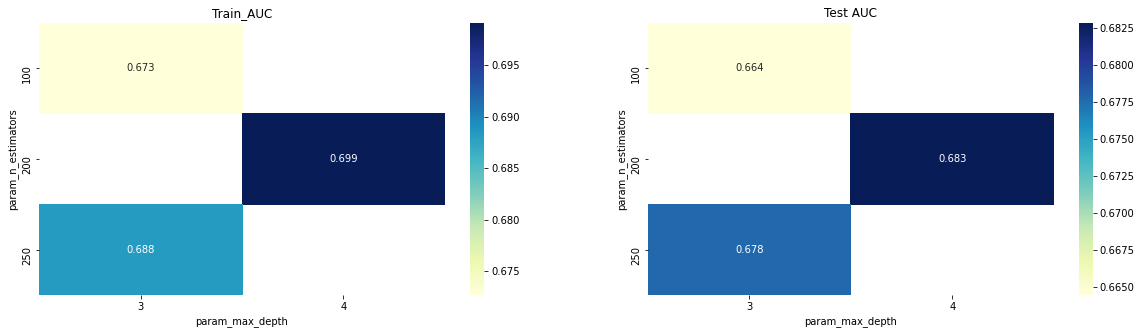



 ROC curve for train and test data: 


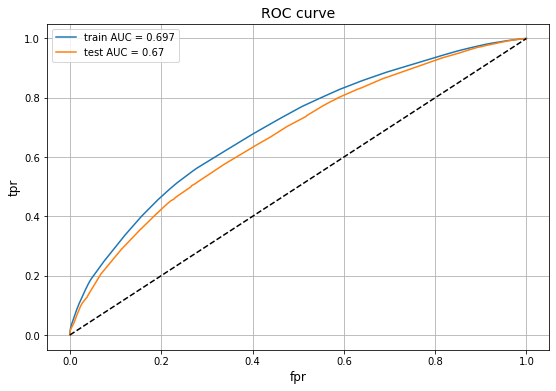

 Best threshold :  0.866333544254303




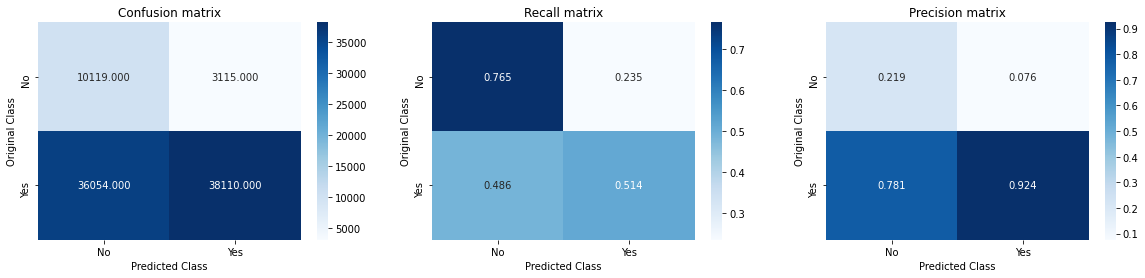

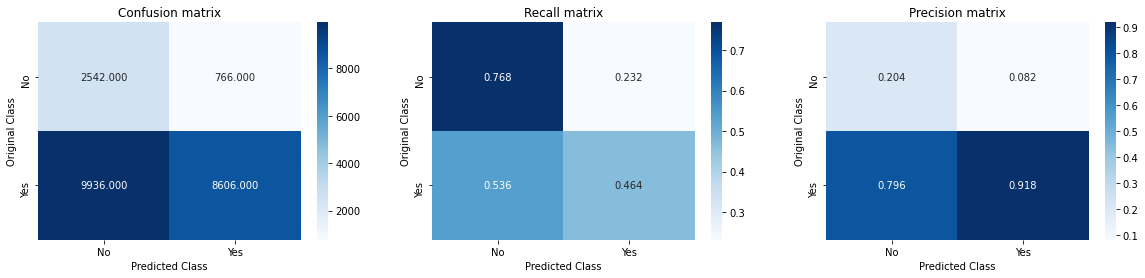

 Set 2: categorical (response coded), numerical features + preprocessed_essay (TFIDF W2V) 


 Optimized model parameters                :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='auc',
              gamma=5.0, learning_rate=0.005, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=None, n_estimators=150, n_jobs=-1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0.4, reg_lambda=1, scale_pos_weight=0.17844237096165255,
              seed=None, silent=None, subsample=0.4, tree_method='gpu_hist',
              verbosity=1)


 AUC score using optimized model on CV data:  0.689


 Time taken to optimize :  0.795  minutes


 The performance of model both on train and cross validation data for each hyper parameter: 
 3D scatter plot: 


 Confusion Matrix: 


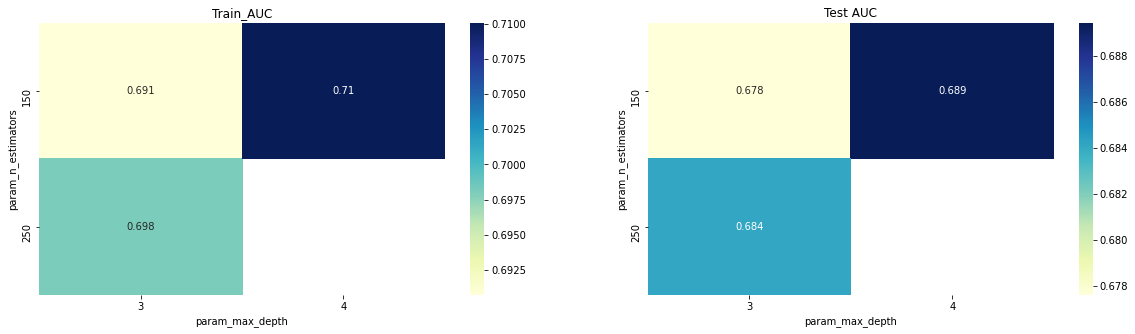



 ROC curve for train and test data: 


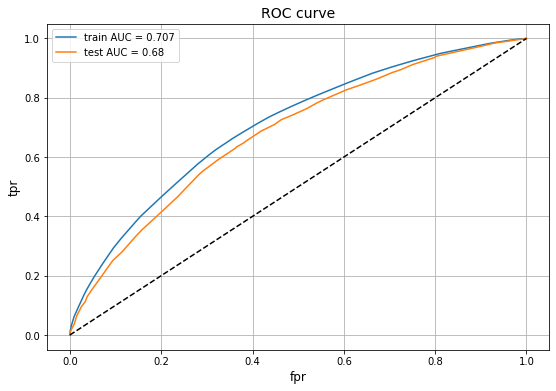

 Best threshold :  0.8866459727287292




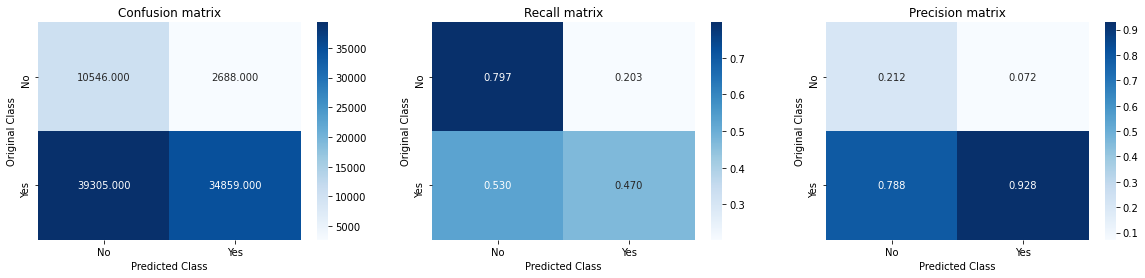

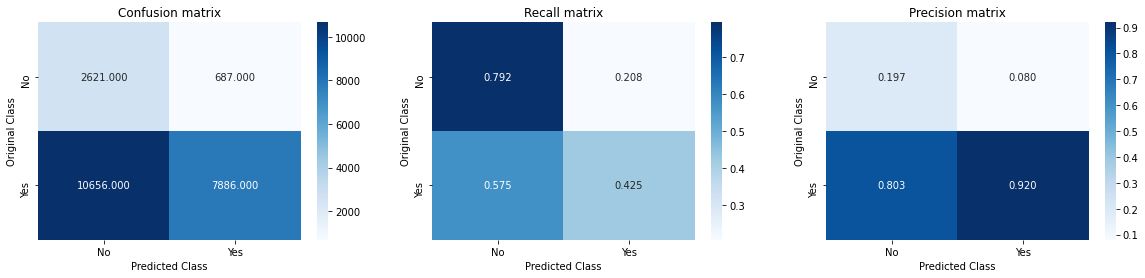

In [ ]:
params = {'max_depth':  list(range(3,5,1)),
          'n_estimators': list(range(50, 500, 50)),
          'colsample_bytree': [0.4,0.5,0.6,0.7],
          'subsample': [0.4,0.5,0.6,0.7],
          'min_child_weight': list(range(1,7)),
          'reg_alpha' : [0.2,0.3,0.4,0.5],
          'gamma': [0.1,1,5,10]}

tuning_method = TuneSearchCV #RandomizedSearchCV # GridSearchCV #

from sklearn.calibration import CalibratedClassifierCV
from prettytable import PrettyTable
import time
summary = PrettyTable(field_names = ['Vectorizer', 'Num of features', 'Param_max_depth', 'Param_n_estimators', 'train_auc', 'test_auc'])

for ind in range(len(x_train_data_sets)):

    # Reference: https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python
    print('\033[1m', sets_description[ind], '\033[0m')
    print('\n')
    # if not os.path.isfile(filepath+'/optimized_xgb_set_'+ str(ind)+'.pkl'):
    start_time = time.time()
    optimized_XGB, best_max_depth, best_n_estimators, cv_results = optimize_xgb(x_train_data_sets[ind], y_train, tuning_method, params, CV=5)  # Optimize model
    print('\n')
    print('\033[1m Time taken to optimize : \033[0m', round((time.time() - start_time)/60,3), ' minutes')

    # Measure the performance of model both on train data and cross validation data for each hyper parameter
    print('\n')
    print('\033[1m The performance of model both on train and cross validation data for each hyper parameter: \033[0m')
    measure_performance(cv_results, scatterplot_3D = True, heatmap = True)  # You can set either of two to False if needed

    y_train_probs, y_test_probs = fit_model_predict_calibrated_prob(optimized_XGB, x_train_data_sets[ind], y_train, x_test_data_sets[ind])

    train_auc, test_auc = plot_roc_curve(y_train, y_train_probs, y_test, y_test_probs) # AUC score on train and test data

    # best threshold
    best_tau = best_threshold(y_train, y_train_probs)
    print('\033[1m Best threshold : \033[0m', best_tau)

    y_tr_pred = np.where(y_train_probs > best_tau, 1, 0)
    y_te_pred = np.where(y_test_probs > best_tau, 1, 0)

    print('\n')
    plot_confusion_matrix(y_train, y_tr_pred)
    plot_confusion_matrix(y_test, y_te_pred)

    summary.add_row([vectorizer[ind], num_features_in_sets[ind], best_max_depth, best_n_estimators, train_auc, test_auc])  # adds row to summary table

## 1.8 Summary
<br> as mentioned in the step 4 of instructions

In [ ]:
# print summary table
print('\033[1m Summary of models \033[0m')
print(summary)

 Summary of models 
+--------------------+-----------------+-----------------+--------------------+-----------+----------+
|     Vectorizer     | Num of features | Param_max_depth | Param_n_estimators | train_auc | test_auc |
+--------------------+-----------------+-----------------+--------------------+-----------+----------+
| TF-IDF + sentiment |       1016      |        4        |        200         |   0.697   |   0.67   |
|     TFIDF W2V      |       312       |        4        |        150         |   0.707   |   0.68   |
+--------------------+-----------------+-----------------+--------------------+-----------+----------+
